In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
netflix_df=pd.read_csv('NetflixOriginals.csv',encoding='latin-1')
netflix_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,5-Aug-19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21-Aug-20,81,2.6,Spanish
2,The App,Science fiction/Drama,26-Dec-19,79,2.6,Italian
3,The Open House,Horror thriller,19-Jan-18,94,3.2,English
4,Kaali Khuhi,Mystery,30-Oct-20,90,3.4,Hindi


In [3]:
netflix_df_prep=netflix_df
netflix_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
netflix_df_prep.shape

(584, 6)

In [5]:
pd.isnull(netflix_df_prep).sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
netflix_df_prep.Genre.value_counts()

Documentary                     159
Drama                            77
Comedy                           49
Romantic comedy                  39
Thriller                         33
                               ... 
Animation/Musical/Adventure       1
Drama/Horror                      1
Psychological thriller drama      1
Science fiction/Mystery           1
Comedy/Fantasy/Family             1
Name: Genre, Length: 115, dtype: int64

In [ ]:
netflix_df_prep['year'] = pd.DatetimeIndex(netflix_df_prep['Premiere']).year
netflix_df_prep.head()

In [ ]:
# sns.histplot(data=netflix_df_prep.year,kde=True)
# plt.show()

In [ ]:
#Add year column
netflix_df_prep.columns=['Title','Genre','Premiere','Runtime','IMDB_Score','Language','year']

C:\Users\ofirg\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


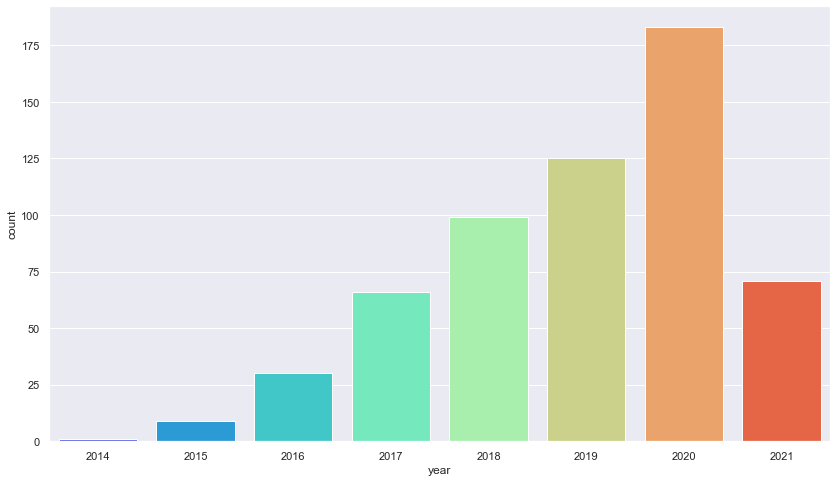

In [65]:
sns.set(rc={'figure.figsize':(14,8)})
ax=sns.countplot(netflix_df_prep['year'],palette='rainbow')
plt.show()

In [68]:
top5_genre=netflix_df_prep[((netflix_df_prep['Genre']=='Documentary')|(netflix_df_prep['Genre']=='Drama')|(netflix_df_prep['Genre']=='Comedy')|
                          (netflix_df_prep['Genre']=='Romantic comedy')|(netflix_df_prep['Genre']=='Thriller'))]
top5_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       357 non-null    object 
 1   Genre       357 non-null    object 
 2   Premiere    357 non-null    object 
 3   Runtime     357 non-null    int64  
 4   IMDB_Score  357 non-null    float64
 5   Language    357 non-null    object 
 6   year        357 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 22.3+ KB


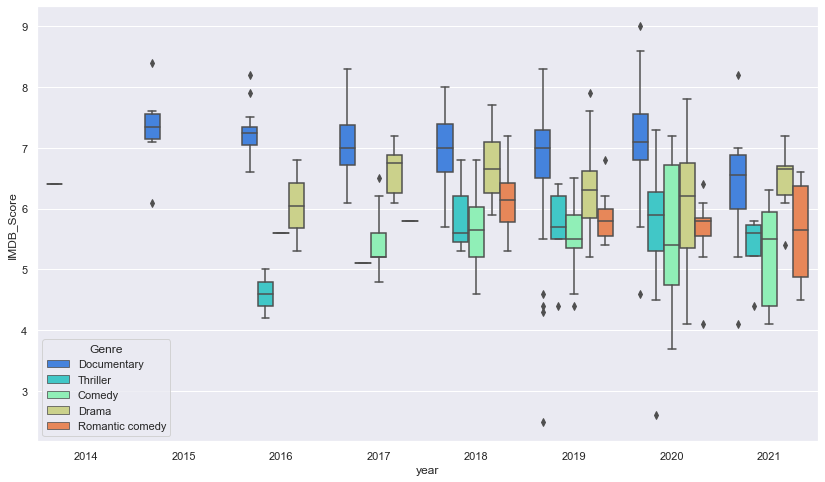

In [70]:
sns.boxplot(x='year',y='IMDB_Score',hue="Genre",palette='rainbow', data=top5_genre)
plt.show()

In [7]:
netflix_df_prep.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Dutch                           3
Marathi                         3
Polish                          3
English/Japanese                2
Filipino                        2
Thai                            2
English/Hindi                   2
English/Mandarin                2
English/Akan                    1
English/Korean                  1
English/Russian                 1
English/Taiwanese/Mandarin      1
Georgian                        1
Khmer/English/French            1
English/Arabic                  1
English/Swedish                 1
Tamil                           1
Malay         

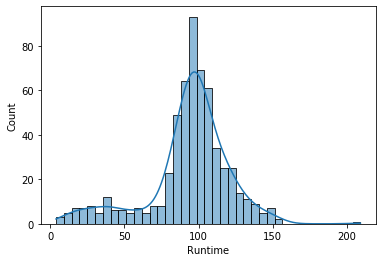

In [10]:
sns.histplot(data=netflix_df_prep.Runtime,kde=True)
plt.show()

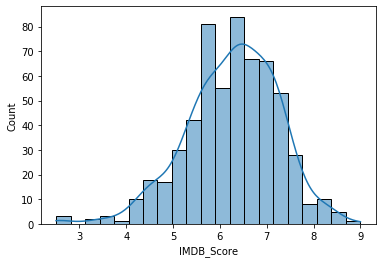

In [12]:
sns.histplot(data=netflix_df_prep.IMDB_Score,kde=True)

             Runtime  IMDB_Score      year
Runtime     1.000000   -0.040896  0.069262
IMDB_Score -0.040896    1.000000 -0.141347
year        0.069262   -0.141347  1.000000


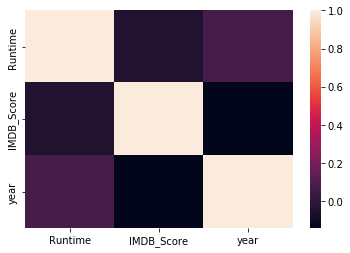

In [13]:
#Correlation 

correlation=netflix_df_prep.corr(method='pearson')
print(correlation)
sns.heatmap(correlation)
plt.show()

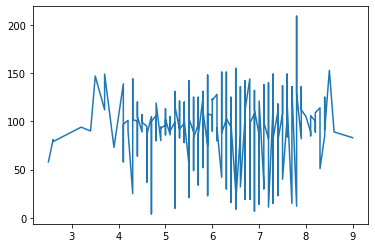

In [14]:
#Correlation between Score and Runtime
plt.plot(netflix_df_prep['IMDB_Score'],netflix_df_prep['Runtime'])

In [15]:
def createDict(lst,df,column):
    dct=dict((j,0) for j in lst)
    for i in lst:
        counter=df[column].str.contains(i).sum()
        if i in lst:
            dct[i]=counter
    return(dct)

In [16]:
netflix_df_prep.describe()

,Runtime,IMDB_Score,year
count,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644
std,27.761683,0.979256,1.473992
min,4.000000,2.500000,2014.000000
25%,86.000000,5.700000,2018.000000
50%,97.000000,6.350000,2019.000000
75%,108.000000,7.000000,2020.000000
max,209.000000,9.000000,2021.000000


In [86]:
df_goupby_year=netflix_df_prep.groupby('year')
df_goupby_year['IMDB_Score'].agg(['min','mean','median','max'])


,min,mean,median,max
year,,,,
2014,6.4,6.400000,6.4,6.4
2015,4.8,6.877778,7.3,8.4
2016,4.2,6.513333,6.7,8.2
2017,4.4,6.422727,6.4,8.3
2018,3.2,6.360606,6.4,8.5
2019,2.5,6.259200,6.4,8.3
2020,2.6,6.195082,6.3,9.0
2021,4.1,6.046479,6.2,8.2


In [84]:
print(netflix_df_prep.groupby('year')['Runtime'].agg(['min','mean','max']))


      min        mean  max
year                      
2014   81   81.000000   81
2015   56   90.444444  136
2016   24   92.200000  116
2017   27   92.863636  136
2018   11   95.000000  153
2019   10   86.848000  209
2020    4   94.994536  155
2021   21  101.605634  148


In [74]:
df_goupby_lang=netflix_df_prep.groupby(['Language'])


In [76]:
df_goupby_lang['year'].value_counts().head(50)


Language                    year
Bengali                     2020      1
Dutch                       2021      2
                            2020      1
English                     2020    105
                            2019     87
                            2018     81
                            2017     60
                            2021     33
                            2016     27
                            2015      7
                            2014      1
English/Akan                2015      1
English/Arabic              2020      1
English/Hindi               2018      1
                            2019      1
English/Japanese            2018      1
                            2019      1
English/Korean              2017      1
English/Mandarin            2016      1
                            2019      1
English/Russian             2016      1
English/Spanish             2019      5
English/Swedish             2019      1
English/Taiwanese/Mandarin  2020      1
English

In [85]:
df_goupby_lang['IMDB_Score'].agg(['median','mean','count']).sort_values(by='count')

,median,mean,count
Language,,,
Bengali,7.10,7.100000,1
Norwegian,5.10,5.100000,1
Khmer/English/French,7.20,7.200000,1
Spanish/Basque,5.60,5.600000,1
Spanish/Catalan,6.40,6.400000,1
Thia/English,6.70,6.700000,1
Spanish/English,7.30,7.300000,1
Georgian,6.80,6.800000,1
Swedish,5.50,5.500000,1


In [85]:
lst=['Documentary','Drama','Comedy','Romantic comedy','Thriller']
d=createDict(lst,netflix_df_prep,'Genre')

Text(0, 0.5, 'Popularity')

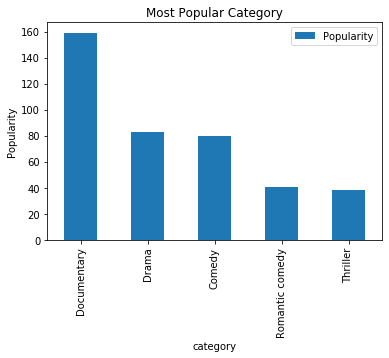

In [89]:

category = sorted(d.items(), key=lambda k: k[1], reverse=True)

df_category = pd.DataFrame(category,columns=['category','Popularity'])
df_category.plot.bar(x='category',y='Popularity')
plt.title('Most Popular Category')
plt.xlabel('category')
plt.ylabel('Popularity')

In [48]:


top6_Language=netflix_df_prep[((netflix_df_prep['Language']=='Hindi')|(netflix_df_prep['Language']=='Spanish')|(netflix_df_prep['Language']=='French')|
                          (netflix_df_prep['Language']=='Italian')|(netflix_df_prep['Language']=='Portuguese')|(netflix_df_prep['Language']=='Korean'))]
top6_Language.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       116 non-null    object 
 1   Genre       116 non-null    object 
 2   Premiere    116 non-null    object 
 3   Runtime     116 non-null    int64  
 4   IMDB_Score  116 non-null    float64
 5   Language    116 non-null    object 
 6   year        116 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 7.2+ KB


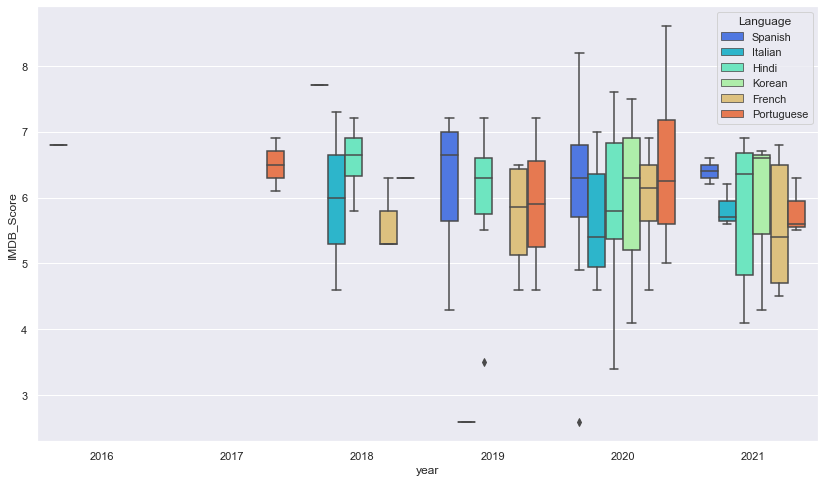

In [49]:
sns.boxplot(x='year',y='IMDB_Score',hue="Language",palette='rainbow', data=top6_Language)
plt.show()

In [60]:

top_Language=netflix_df_prep[((netflix_df_prep['Language']=='English/Akan')|(netflix_df_prep['Language']=='English/Hindi')|
                          (netflix_df_prep['Language']=='English/Japanese')|(netflix_df_prep['Language']=='English/Korean')|(netflix_df_prep['Language']=='English/Mandarin')|
                          (netflix_df_prep['Language']=='English/Russian')|
                          (netflix_df_prep['Language']=='Spanish/English')|
                          (netflix_df_prep['Language']=='English/Swedish')|
                          (netflix_df_prep['Language']=='English/Taiwanese/Mandarin')|
                          (netflix_df_prep['Language']=='English/Ukranian/Russian')|
                          (netflix_df_prep['Language']=='Khmer/English/French')
                             )]
top_Language.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 580
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       14 non-null     object 
 1   Genre       14 non-null     object 
 2   Premiere    14 non-null     object 
 3   Runtime     14 non-null     int64  
 4   IMDB_Score  14 non-null     float64
 5   Language    14 non-null     object 
 6   year        14 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 896.0+ bytes


C:\Users\ofirg\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


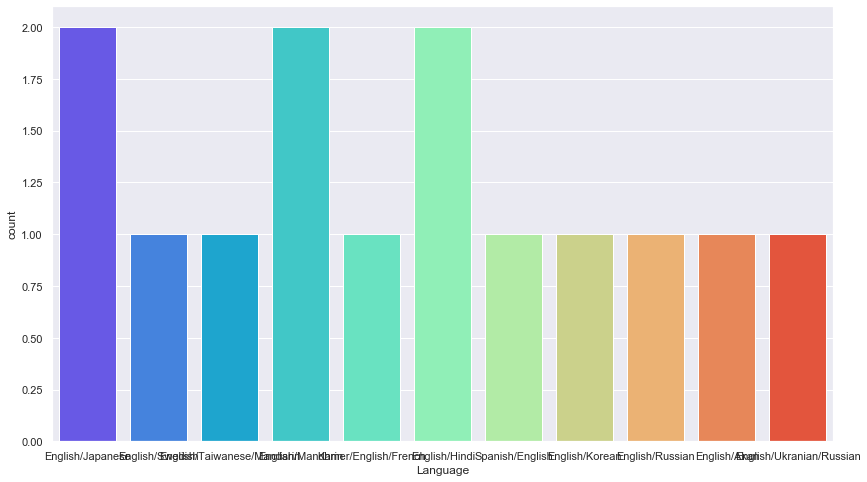

In [62]:
sns.set(rc={'figure.figsize':(14,8)})
ax=sns.countplot(top_Language['Language'],palette='rainbow')
plt.show()

In [122]:
# netflix_df_prep['Premiere'] = pd.to_datetime(netflix_df_prep['Premiere'])
# netflix_df_prep['Month'] = netflix_df_prep['Premiere'].apply(lambda x:x.month)
# netflix_df_prep.head()

,Title,Genre,Premiere,Runtime,IMDB_Score,Language,year,Month
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10
